In [14]:
import pandas as pd
df = pd.read_csv('dataSet.csv')

In [15]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [17]:
print(df.isnull().sum())

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


In [18]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [19]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


In [20]:
df.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       0   19            19000          0
1    15810944       0   35            20000          0
2    15668575       1   26            43000          0
3    15603246       1   27            57000          0
4    15804002       0   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       1   46            41000          1
396  15706071       0   51            23000          1
397  15654296       1   50            20000          1
398  15755018       0   36            33000          0
399  15594041       1   49            36000          1

[400 rows x 5 columns]>

In [21]:
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

In [22]:
import numpy as np

class NaiveBayesCustom:
    def fit(self, X, y):
        self.classes = np.unique(y)  # Sınıflar (0 ve 1)
        self.class_probs = {}  # Her sınıfın olasılığı
        self.feature_stats = {}  # Her sınıf için özelliklerin istatistikleri

        # Her sınıf için:
        for c in self.classes:
            X_c = X[y == c]  # Sadece o sınıfa ait veriler
            self.class_probs[c] = len(X_c) / len(y)  # Sınıfın olasılığı (P(c))

            # Her özellik için ortalama ve standart sapma hesapla
            self.feature_stats[c] = {
                'mean': X_c.mean(axis=0),  # Özelliklerin ortalamaları
                'std': X_c.std(axis=0)  # Özelliklerin standart sapmaları
            }

    def predict(self, X):
        predictions = []
        
        # Her bir test örneği için:
        for x in X:
            class_probs = {}
            
            # Her sınıf için olasılığı hesapla
            for c in self.classes:
                prob = np.log(self.class_probs[c])  # P(c) olasılığının log'u

                # Her özellik için Gaussian olasılığını hesapla
                for i in range(len(x)):
                    mean = self.feature_stats[c]['mean'][i]
                    std = self.feature_stats[c]['std'][i]
                    
                    # Gaussian dağılımının olasılık fonksiyonu
                    gaussian_prob = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x[i] - mean) / std) ** 2)
                    
                    # Bu özelliğin olasılığının log'unu al
                    prob += np.log(gaussian_prob)

                class_probs[c] = prob

            # En yüksek olasılığa sahip sınıfı seç
            predictions.append(max(class_probs, key=class_probs.get))
        
        return np.array(predictions)


In [23]:
import time
custom_model = NaiveBayesCustom()
start_time = time.time()  
custom_model.fit(X, y)
fit_time = time.time() - start_time  
print(f"Model eğitim süresi: {fit_time:.4f} saniye")

Model eğitim süresi: 0.0000 saniye


In [24]:
start_time = time.time()
y_pred_custom = custom_model.predict(X)
predict_time = time.time() - start_time
print(f"Model test süresi: {predict_time:.4f} saniye")

Model test süresi: 0.0110 saniye


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Doğruluk oranı
accuracy_custom = accuracy_score(y, y_pred_custom)
print("Doğruluk Oranı:", accuracy_custom)

# Karmaşıklık matrisi
cm_custom = confusion_matrix(y, y_pred_custom)
print("Karmaşıklık Matrisi:\n", cm_custom)


Doğruluk Oranı: 0.895
Karmaşıklık Matrisi:
 [[239  18]
 [ 24 119]]


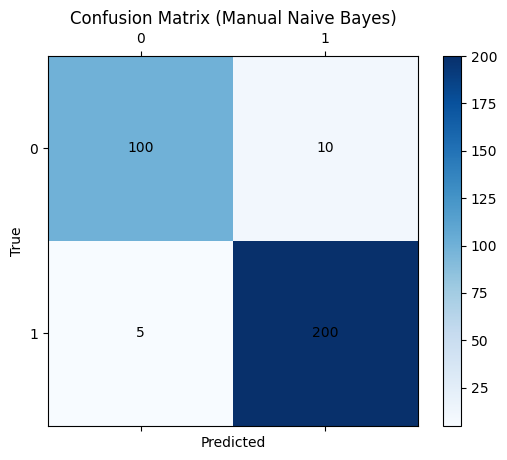

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Örnek karmaşıklık matrisi (gerçek ve tahmin edilen sonuçlar)
cm_custom = np.array([[100, 10], [5, 200]])

# Karmaşıklık matrisini çizme
fig, ax = plt.subplots()
cax = ax.matshow(cm_custom, cmap="Blues")

# Başlık ve etiketler
plt.title('Confusion Matrix (Manual Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('True')

# Değerler üzerine yazdırma
for (i, j), value in np.ndenumerate(cm_custom):
    ax.text(j, i, str(value), ha='center', va='center', color='black')

# Renk çubuğu ekleme
fig.colorbar(cax)

# Grafik gösterimi
plt.show()
